In [1]:
import pandas as pd

In [14]:
database = pd.read_csv("sqlResult_1558435.csv", encoding='gb18030')

In [262]:
contents = database['content']

In [46]:
contents[1]

'骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n'

In [47]:
import re

In [60]:
def cut(content):
    return ''.join(re.compile(r'[\w|\d]+').findall(content))

In [112]:
cut('骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n')

'骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台'

In [122]:
def get_tokens(contents):
    tokens = []
    for content in contents:
        tokens.append([word for word in jieba.cut(cut(str(content)))])
    return tokens

In [130]:
all_tokens = get_tokens(contents)

In [131]:
len(all_tokens)

89611

In [132]:
all_tokens[:2]

[['此外',
  '自',
  '本周',
  '6',
  '月',
  '12',
  '日起',
  '除',
  '小米',
  '手机',
  '6',
  '等',
  '15',
  '款',
  '机型',
  '外',
  '其余',
  '机型',
  '已',
  '暂停',
  '更新',
  '发布',
  '含',
  '开发',
  '版',
  '体验版',
  '内测',
  '稳定版',
  '暂不受',
  '影响',
  '以',
  '确保',
  '工程师',
  '可以',
  '集中',
  '全部',
  '精力',
  '进行',
  '系统优化',
  '工作',
  '有人',
  '猜测',
  '这',
  '也',
  '是',
  '将',
  '精力',
  '主要',
  '用到',
  'MIUI9',
  '的',
  '研发',
  '之中',
  'MIUI8',
  '去年',
  '5',
  '月',
  '发布',
  '距今已有',
  '一年',
  '有余',
  '也',
  '是',
  '时候',
  '更新换代',
  '了',
  '当然',
  '关于',
  'MIUI9',
  '的',
  '确切',
  '信息',
  '我们',
  '还是',
  '等待',
  '官方消息'],
 ['骁龙',
  '835',
  '作为',
  '唯一',
  '通过',
  'Windows10',
  '桌面',
  '平台',
  '认证',
  '的',
  'ARM',
  '处理器',
  '高通',
  '强调',
  '不会',
  '因为',
  '只',
  '考虑',
  '性能',
  '而',
  '去',
  '屏蔽掉',
  '小',
  '核心',
  '相反',
  '他们',
  '正',
  '联手',
  '微软',
  '找到',
  '一种',
  '适合',
  '桌面',
  '平台',
  '的',
  '兼顾',
  '性能',
  '和',
  '功耗',
  '的',
  '完美',
  '方案',
  '报道',
  '称',
  '微软',
  '已经',
  '拿到',
  '了',
  '一些',
 

In [133]:
from gensim.models import Word2Vec

In [134]:
sentence = [list(token) for token in all_tokens]

In [135]:
model = Word2Vec(all_tokens, workers=8)

In [138]:
model.most_similar("说")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('表示', 0.863144040107727),
 ('认为', 0.7961944937705994),
 ('指出', 0.7779885530471802),
 ('告诉', 0.7507252097129822),
 ('说完', 0.7255903482437134),
 ('看来', 0.7144650220870972),
 ('坦言', 0.7001689672470093),
 ('介绍', 0.6765984296798706),
 ('明说', 0.6720010042190552),
 ('称', 0.6367825865745544)]

In [139]:
from collections import defaultdict

## More Data, Better Results

In [147]:
def traverse(init_word, model, count):
    
    relate_word = [init_word]
    seen = defaultdict(int)
    
    while(len(seen) < count):
    
        node = relate_word.pop(0)
        
        relate_word += [word for word, _ in model.most_similar(node)]
        
        seen[node] += 1
        
    return sorted(seen.items(), key=lambda kv: kv[1], reverse=True)

In [149]:
traverse("说", model, 50)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


[('说', 23),
 ('表示', 21),
 ('坦言', 20),
 ('认为', 19),
 ('指出', 15),
 ('告诉', 14),
 ('看来', 14),
 ('明说', 11),
 ('称', 11),
 ('透露', 10),
 ('说完', 9),
 ('介绍', 8),
 ('强调', 7),
 ('所说', 7),
 ('建议', 6),
 ('普遍认为', 5),
 ('提到', 4),
 ('说道', 3),
 ('眼中', 3),
 ('留意到', 2),
 ('见到', 2),
 ('问', 2),
 ('文说', 2),
 ('直言', 2),
 ('了解', 2),
 ('获悉', 2),
 ('还称', 2),
 ('中称', 2),
 ('称该', 2),
 ('声称', 2),
 ('中说', 2),
 ('地说', 1),
 ('称赞', 1),
 ('德说', 1),
 ('祁', 1),
 ('刘', 1),
 ('国利', 1),
 ('农艺师', 1),
 ('永康', 1),
 ('志军', 1),
 ('董', 1),
 ('重申', 1),
 ('特别强调', 1),
 ('敦促', 1),
 ('呼吁', 1),
 ('知情', 1),
 ('推测', 1),
 ('披露', 1),
 ('证实', 1),
 ('猜测', 1)]

## TFIDF Key words

In [162]:
def get_tf(word, document):
    return sum(1 for w in document if w == word)

In [163]:
all_tokens[0]

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息']

In [166]:
get_tf("的",all_tokens[0])

2

In [167]:
import math

In [169]:
def get_idf(word, documents):
    count = sum(1 for doc in documents if word in doc)
    return math.log10(len(documents) / count)

In [172]:
get_idf("小米",all_tokens)

2.9655895895262288

In [174]:
get_idf("的",all_tokens)

0.10539364348661012

In [175]:
def get_tfidf(word, document, documents):
    return get_tf(word, document) * get_idf(word, documents)

In [177]:
get_tfidf("小米",all_tokens[0], all_tokens)

2.9655895895262288

In [179]:
get_tfidf("的",all_tokens[0], all_tokens)

0.21078728697322024

In [185]:
def get_key_words(document, all_documents):
    key_words = [(word, get_tfidf(word, document, all_documents))
                for word in document]
    return sorted(key_words, key=lambda x: x[1], reverse=True)

In [188]:
get_key_words(all_tokens[0], all_tokens)[:10]

[('MIUI9', 9.904722647584947),
 ('MIUI9', 9.904722647584947),
 ('机型', 5.922270496199958),
 ('机型', 5.922270496199958),
 ('精力', 5.177498687800658),
 ('精力', 5.177498687800658),
 ('体验版', 4.9523613237924735),
 ('稳定版', 4.9523613237924735),
 ('暂不受', 4.9523613237924735),
 ('系统优化', 4.9523613237924735)]

# Wordcloud

In [191]:
import wordcloud

In [193]:
wc = wordcloud.WordCloud("/Users/shlin/wspace/github/AI-For-NLP/lecture-6/online/SourceHanSerifSC-Regular.otf")

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
text = get_key_words(all_tokens[0], all_tokens)[:10]

In [206]:
text

[('MIUI9', 9.904722647584947),
 ('MIUI9', 9.904722647584947),
 ('机型', 5.922270496199958),
 ('机型', 5.922270496199958),
 ('精力', 5.177498687800658),
 ('精力', 5.177498687800658),
 ('体验版', 4.9523613237924735),
 ('稳定版', 4.9523613237924735),
 ('暂不受', 4.9523613237924735),
 ('系统优化', 4.9523613237924735)]

In [207]:
text_dict = {word:score for word, score in text}

In [209]:
text_dict

{'MIUI9': 9.904722647584947,
 '机型': 5.922270496199958,
 '精力': 5.177498687800658,
 '体验版': 4.9523613237924735,
 '稳定版': 4.9523613237924735,
 '暂不受': 4.9523613237924735,
 '系统优化': 4.9523613237924735}

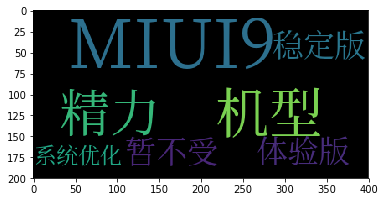

In [215]:
plt.imshow(wc.generate_from_frequencies(text_dict))

## TFIDF Vectorizezd

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [225]:
vectorizer = TfidfVectorizer(max_features=10000)

In [231]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]

In [249]:
def get_corpus(contents):
    return [' '.join(jieba.cut(cut(str(content)))) for content in contents]

In [250]:
contents[:2]

0    此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1    骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
Name: content, dtype: object

In [442]:
corpus = get_corpus(contents)

In [404]:
corpus[:2]

['此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息',
 '骁龙 835 作为 唯一 通过 Windows10 桌面 平台 认证 的 ARM 处理器 高通 强调 不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心 相反 他们 正 联手 微软 找到 一种 适合 桌面 平台 的 兼顾 性能 和 功耗 的 完美 方案 报道 称 微软 已经 拿到 了 一些 新 的 源码 以便 Windows10 更好 地 理解 biglittle 架构 资料 显示 骁龙 835 作为 一款 集成 了 CPUGPU 基带 蓝牙 WiFi 的 SoC 比 传统 的 Wintel 方案 可以 节省 至少 30 的 PCB 空间 按计划 今年 Q4 华硕 惠普 联想 将 首发 骁龙 835Win10 电脑 预计 均 是 二合一 形态 的 产品 当然 高通 骁龙 只是 个 开始 未来 也许 还 能 见到 三星 Exynos 联发科 华为 麒麟 小米 澎湃 等 进入 Windows10 桌面 平台']

In [253]:
X = vectorizer.fit_transform(corpus)

In [255]:
X.shape

(89611, 10000)

In [267]:
vectorizer.vocabulary_

{'此外': 6209,
 '本周': 5900,
 '12': 32,
 '日起': 5633,
 '小米': 4001,
 '手机': 4893,
 '15': 46,
 '其余': 1844,
 '暂停': 5754,
 '更新': 5774,
 '发布': 2633,
 '开发': 4429,
 '影响': 4557,
 '确保': 7354,
 '工程师': 4163,
 '可以': 2731,
 '集中': 9612,
 '全部': 1748,
 '精力': 7689,
 '进行': 9112,
 '工作': 4145,
 '有人': 5820,
 '猜测': 6902,
 '主要': 937,
 '研发': 7335,
 '之中': 959,
 '去年': 2548,
 '一年': 329,
 '时候': 5650,
 '当然': 4534,
 '关于': 1822,
 '信息': 1560,
 '我们': 4826,
 '还是': 9058,
 '等待': 7626,
 '作为': 1456,
 '唯一': 2965,
 '通过': 9221,
 '平台': 4288,
 '认证': 8560,
 '强调': 4510,
 '不会': 574,
 '因为': 3043,
 '考虑': 8007,
 '性能': 4668,
 '核心': 6079,
 '相反': 7230,
 '他们': 1265,
 '联手': 8045,
 '微软': 4604,
 '找到': 4966,
 '一种': 374,
 '适合': 9164,
 '兼顾': 1865,
 '完美': 3803,
 '方案': 5561,
 '报道': 5039,
 '已经': 4188,
 '拿到': 5115,
 '一些': 281,
 '以便': 1280,
 '更好': 5771,
 '理解': 6989,
 '架构': 6035,
 '资料': 8794,
 '显示': 5723,
 '一款': 361,
 '集成': 9618,
 '传统': 1374,
 '节省': 8212,
 '至少': 8147,
 '30': 102,
 '空间': 7515,
 '按计划': 5144,
 '今年': 1238,
 '联想': 8044,
 '首发': 9811,
 '电脑': 70

In [269]:
X[0].toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [271]:
from pandas import np

In [272]:
np.where(X[0].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  32,   46,  329,  937,  959, 1560, 1748, 1822, 1844, 2548, 2633,
        2731, 4001, 4145, 4163, 4429, 4534, 4557, 4826, 4893, 5633, 5650,
        5754, 5774, 5820, 5900, 6209, 6902, 7335, 7354, 7626, 7689, 9058,
        9112, 9612]))

In [274]:
from scipy.spatial.distance import cosine

In [276]:
def distance(v1, v2):
    return cosine(v1, v2)

In [278]:
distance(X[0].toarray(), X[1].toarray())

0.9329498987349365

## Build Search Engine

In [482]:
transpose_x = X.transpose().toarray()

In [483]:
transpose_x.shape

(10000, 89611)

In [484]:
vectorizer.vocabulary_["小米"]

4001

In [493]:
np.where(transpose_x[4001])[0]

array([    0,     1,    91,   244,   249,   276,   440,   447,   465,
         471,  1079,  1128,  1131,  1171,  1197,  1344,  1378,  1409,
        2003,  2126,  2540,  3227,  3427,  3430,  3561,  3574,  3639,
        4068,  4730,  4836,  5185,  5217,  5467,  5612,  5811,  5863,
        5978,  6916,  7195,  7338,  7805,  7861,  7990,  8067, 10629,
       10973, 13775, 13792, 15109, 19006, 20433, 21656, 27828, 28077,
       35239, 37420, 37503, 41554, 41802, 42731, 43031, 45952, 49996,
       49999, 50171, 50314, 50566, 50599, 50628, 52384, 52654, 55711,
       55792, 56545, 56546, 56683, 57473, 58311, 60682, 63096, 63113,
       66308, 66642, 66918, 67133, 69906, 70786, 71842, 71968, 71970,
       74776, 77249, 77320, 77750, 79451, 81583, 81753])

In [451]:
np.where(vectorizer.transform(["手机 小米"]).toarray()[0])

(array([4001, 4893]),)

In [488]:
from operator import and_
from functools import reduce

In [491]:
reduce(and_, [{1,2,3}, {1,5,6}])

{1}

In [557]:
def simple_searcher(words):
    key_words = words.split()
    
    query_vec = vectorizer.transform([' '.join(key for key in key_words)]).toarray()[0]
    
    document_id = [
        set(np.where(transpose_x[_id])[0]) for _id in np.where(query_vec)[0]
    ]

    target_id = reduce(and_, document_id)
    
    target_id = sorted(target_id, key=lambda x: distance(query_vec, X[x].toarray()))
    
    return target_id

In [558]:
simple_searcher("手机 小米")

[52384,
 471,
 5978,
 1344,
 1378,
 71842,
 69906,
 50628,
 70786,
 56683,
 49999,
 440,
 1409,
 55711,
 63096,
 0,
 63113,
 2540,
 37420,
 91,
 37503,
 50599,
 56545,
 447,
 58311,
 3227,
 10629,
 276,
 35239,
 5185,
 4836,
 5811,
 5612,
 4730,
 465,
 66918,
 3430,
 8067,
 55792,
 7805]

In [560]:
contents[52384]

'\u3000\u3000新华社北京５月６日电特写：通民心\u3000天涯近咫尺——“一带一路”加速小米“通商”路\\n\u3000\u3000新华社记者邹多为\u3000刘海燕\\n\u3000\u3000“我已经从资深‘米粉’变成‘米工’了！”２８岁的俄罗斯小伙儿德罗兹多夫·叶夫根尼美滋滋地说，“小米的产品在俄罗斯越来越受欢迎。”\\n\u3000\u3000“每到节日我们店都得多备货，因为小米已成为迪拜很多‘米粉’节日送礼的第一选择。”迪拜阿尔瓦斯尔小米专营店销售顾问穆罕默德·里亚兹不仅自己使用小米手机，身边很多人也在他的影响下成为“米粉”。\\n\u3000\u3000“电池很耐用，在睡觉关机的情况下，平均３天充一次电就行了。”去年年底购入红米３Ｓ手机的波兰青年奥斯卡·格鲁什琴斯基希望小米尽快提高在波兰的知名度，这样自己的手机更新换代和售后服务就能更完善了。\\n\u3000\u3000“米粉”是对小米科技公司产品忠实拥趸的网络热称。近年来，随着小米国际化步伐的展开，海外“米粉”群体不断壮大。在小米产品已经进入的２０多个国家里，越来越多的人开始知道中国品牌小米，使用小米产品，甚至成为“米粉”。\\n\u3000\u3000“一带一路”倡议成为小米国际化步伐的加速器。由于“一带一路”沿线国家的消费者偏好与小米的产品和技术乃至商业模式比较契合，小米的国际化迎来大发展。\\n\u3000\u3000“无论对于企业还是海外消费者，‘一带一路’离我们都非常近，”小米董事长雷军接受新华社记者采访时说，“中国企业征战全球最有力的武器，不是低成本，而是有技术、有设计、体验好的高性价比。产品打动人心，距离就不成问题了。”\\n\u3000\u3000刚刚携３款智能手机在俄罗斯进行官方首秀的小米公司高级副总裁王翔不禁发出感慨：“我们已经感受到海外‘米粉’的巨大支持。”\\n\u3000\u3000作为资深“米粉”的叶夫根尼６年前在朋友推荐下开始尝试小米交互系统ＭＩＵＩ，从此便爱上了这个系统，还慢慢变成了“米粉”。\\n\u3000\u3000叶夫根尼当年就自发创立ＭＩＵＩ俄罗斯粉丝论坛，一年后该论坛成为小米俄罗斯官方的ＭＩＵＩ粉丝站。目前，论坛已有１１万注册粉丝，每日浏览量达７万人次。\\n\u3000\u3000“我虽然没有去过中国，但用了中国产品后，我感觉中国离我很近。”如

## PageRank

In [563]:
import networkx as nx

In [566]:
import random
from string import ascii_uppercase

In [567]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [600]:
def generate_website():
    site = ''.join(random.choice(ascii_uppercase) for i in range(random.randint(1, 10))) \
            + random.choice(['.com', '.cn'])
    return site

In [602]:
generate_website()

'E.cn'

In [604]:
websites = [generate_website() for _ in range(25)]

In [606]:
websites

['P.com',
 'DAHHANTWH.com',
 'DQWO.cn',
 'F.com',
 'GPLIJ.cn',
 'MNGRUMJLBX.cn',
 'IZBYKUZI.cn',
 'J.cn',
 'TFEZXPWTUD.com',
 'I.cn',
 'FTLFVCOGJD.cn',
 'YWTXW.cn',
 'GQZIFIXG.cn',
 'NYORF.com',
 'KNBVEFKIQ.cn',
 'APHY.com',
 'ZHDNFKC.com',
 'TCLXVMPIKW.cn',
 'MUEARAEYJ.cn',
 'JMUUXHI.com',
 'KY.cn',
 'UTJ.cn',
 'ALFZIQTVSG.cn',
 'NSFPHV.cn',
 'X.cn']

In [608]:
random.sample(websites, 10)

['TFEZXPWTUD.com',
 'J.cn',
 'F.com',
 'DAHHANTWH.com',
 'GQZIFIXG.cn',
 'YWTXW.cn',
 'MUEARAEYJ.cn',
 'P.com',
 'NSFPHV.cn',
 'IZBYKUZI.cn']

In [610]:
website_connection = {
    websites[0]: random.sample(websites, 9),
    websites[1]: random.sample(websites, 4),
    websites[3]: random.sample(websites, 2),
    websites[4]: random.sample(websites, 8),
    websites[5]: random.sample(websites, 3),
}

In [613]:
website_network = nx.graph.Graph(website_connection)

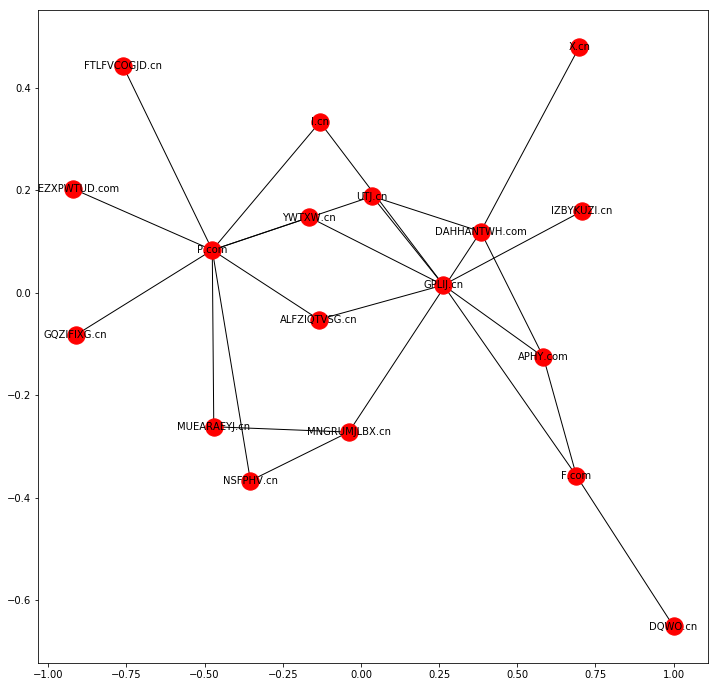

In [615]:
plt.figure(3,figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)

In [616]:
sorted(nx.pagerank(website_network).items(),key=lambda x: x[1], reverse=True)

[('P.com', 0.17595101279528236),
 ('GPLIJ.cn', 0.14668457208918742),
 ('DAHHANTWH.com', 0.0802764466934757),
 ('F.com', 0.06276778639062316),
 ('MNGRUMJLBX.cn', 0.06138330161759792),
 ('APHY.com', 0.05876157996252837),
 ('UTJ.cn', 0.0575954946621136),
 ('MUEARAEYJ.cn', 0.0423435906025848),
 ('NSFPHV.cn', 0.0423435906025848),
 ('YWTXW.cn', 0.040536775956006285),
 ('I.cn', 0.040536775956006285),
 ('ALFZIQTVSG.cn', 0.040536775956006285),
 ('DQWO.cn', 0.026117435329350677),
 ('X.cn', 0.025392052039440647),
 ('GQZIFIXG.cn', 0.024951350028935906),
 ('TFEZXPWTUD.com', 0.024951350028935906),
 ('FTLFVCOGJD.cn', 0.024951350028935906),
 ('IZBYKUZI.cn', 0.023918759260403714)]